<a href="https://colab.research.google.com/github/fuanonemus/cop4630spring2020/blob/master/HW3_4630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

# Problem 1

get_random_data generates random data for logistic regression with two features. Each data point has a coordinate (x,y) stored in data and a corresponding label.

In [0]:
def get_random_data(w, b, mu, sigma, m) :
  # initialize labels and data
  labels = np.random.randint(0,2,m)
  data = np.empty((m,2))

  # calculate labels and data
  for row, c in zip(data, labels):
    row[0] = np.random.uniform(0,1)
    n = np.random.normal(mu,sigma)
    row[1] = w * row[0] + b + (-1)**c * n
  
  return labels, data

display_random_data plots data. Data with label 0 is blue and data with label 1 is red

In [0]:
def display_random_data(labels, data):
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)

  for row, c in zip(data, labels):
    if c == 0:
      plt.plot(row[0],row[1],"r.")
    else:
      plt.plot(row[0],row[1],"b.")
  
  plt.xlabel("$x1$", fontsize=18)
  plt.ylabel("$x2$", rotation=0, fontsize=18)
  plt.show()

Sample run

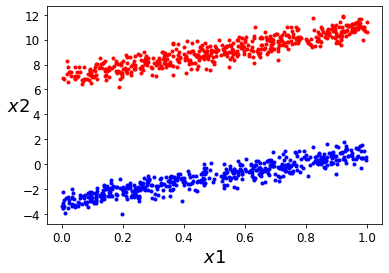

In [180]:
dataCount = 1000
w = 4
b = 2
mu = 5
sigma = 0.5
returnedData = get_random_data(w, b, mu, sigma, dataCount)
display_random_data(returnedData[0],returnedData[1])

# relabel data
xsys = returnedData[1]
labels = returnedData[0]

# divide data into training and testing sets
trainsetIn = xsys[:int(dataCount*.8)]
trainsetOut = labels[:int(dataCount*.8)]
testsetIn = xsys[int(dataCount*.8):]
testsetOut = labels[int(dataCount*.8):]

# Problem 2

graph_data_lines plots the random data, calculates the true line and the line generated by the model and graphs them.

In [0]:
def graph_data_lines(w, b, weights, data, labels):
  # set up plot
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)
  plt.xlabel("$x1$", fontsize=18)
  plt.ylabel("$x2$", rotation=0, fontsize=18)

  # x values
  x = np.linspace(0, 1, dtype=float)
  
  # plot the line that generated the data
  trueline = w * x + b
  plt.plot(x, trueline)

  # plot the line generated by the model to separate the data
  modelline = (-1 * (weights[0][0] / weights[0][1]) * x) 
  modelline += (-1 * (weights[1][0] / weights[0][1]))
  plt.plot(x, modelline)

  # plot the random data
  for row, c in zip(data, labels):
    if c == 0:
      plt.plot(row[0],row[1],"r.")
    else:
      plt.plot(row[0],row[1],"b.")

  plt.show()

Create the model, train it, and get metrics

Epoch 1/10
100/100 [==============================] - 0s 931us/step - loss: 0.2378
Epoch 2/10
100/100 [==============================] - 0s 928us/step - loss: 0.0109
Epoch 3/10
100/100 [==============================] - 0s 906us/step - loss: 0.0022
Epoch 4/10
100/100 [==============================] - 0s 1ms/step - loss: 5.4742e-04
Epoch 5/10
100/100 [==============================] - 0s 935us/step - loss: 1.3574e-04
Epoch 6/10
100/100 [==============================] - 0s 942us/step - loss: 6.2671e-05
Epoch 7/10
100/100 [==============================] - 0s 908us/step - loss: 4.9036e-05
Epoch 8/10
100/100 [==============================] - 0s 986us/step - loss: 4.1609e-05
Epoch 9/10
100/100 [==============================] - 0s 944us/step - loss: 3.4271e-05
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 1.0878e-04


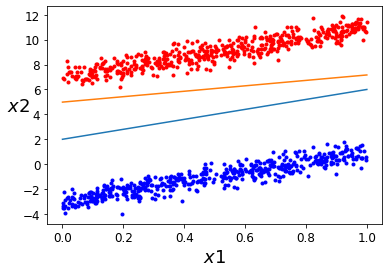

In [182]:
# configure and train keras model
network = models.Sequential()
network.add(layers.Dense(1, input_shape=(2,)))
network.compile(optimizer='sgd', loss='binary_crossentropy')
network.fit(x=trainsetIn, y=trainsetOut, batch_size=8, epochs=10)

# test model and get metrics
test_loss = network.evaluate(x=testsetIn, y=testsetOut)
weights = network.layers[0].get_weights()

# graph prediction line
graph_data_lines(w, b, weights, xsys, labels)

Generate a heatmap based on the model

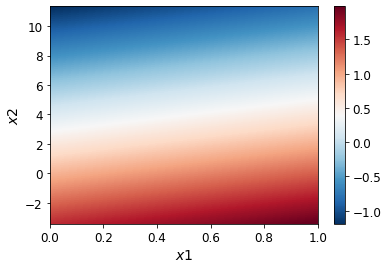

In [183]:
# generate some data, run it through the model
y_max = max(testsetIn[:, 1])
y_min = min(testsetIn[:, 1])
x = np.linspace(0, 1, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)
Z = np.column_stack((X.flatten(), Y.flatten()))
Z = network.predict(Z)
Z = Z.reshape((x.shape[0], x.shape[0]))

# plot heatmap
plt.figure()
ax = plt.axes()
im = ax.imshow(Z, extent=[0, 1, y_min, y_max], origin='lower', cmap='RdBu_r', alpha=1, aspect='auto')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
plt.show()

# Problem 3

Sigmoid and binary cross entropy loss functions

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def calcloss(h, y):
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

Generate a Logistic Regression model.

In [0]:
# reconfigure training set to add column for bias
trainsetIn = np.column_stack((np.ones((trainsetIn.shape[0], 1)), trainsetIn))

# theta is the weights and the bias
theta = np.zeros(trainsetIn.shape[1])
epochs = 500
lr = 0.01

# train the model
for i in range(epochs):
  z = np.dot(trainsetIn, theta)
  h = sigmoid(z)
  gradient = np.dot(trainsetIn.T, (h - trainsetOut)) / trainsetOut.size
  theta -= lr * gradient

  z = np.dot(trainsetIn, theta)
  h = sigmoid(z)
  loss = calcloss(h, trainsetOut)

Test model and run metrics

In [186]:
# reconfigure test set for bias column
testsetIn = np.column_stack((np.ones((testsetIn.shape[0], 1)), testsetIn))

# run tests and calculate loss
predictions = sigmoid(np.dot(testsetIn, theta)).round()
testloss = calcloss(sigmoid(np.dot(testsetIn, theta)), testsetOut)

# calculate accuracy of each prediction
accuracy = 0
for i in np.arange(testsetOut.shape[0]):
  if predictions[i] == testsetOut[i]:
    accuracy += 1 / testsetOut.shape[0]
print("Loss : {}, Accuracy : {}".format(testloss, accuracy))

Loss : 0.12031248942301127, Accuracy : 0.9850000000000008


Graph model

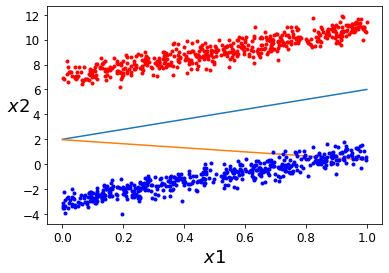

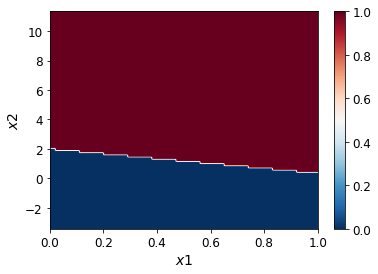

In [187]:
# graph model
weights = np.array([[theta[0], theta[1]], [theta[2]]])
graph_data_lines(w, b, weights, xsys, labels)

# heatmap
# generate some data, run it through the model
x = np.linspace(0, 1, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)
Z = np.column_stack((X.flatten(), Y.flatten(), np.ones(10000)))
Z = sigmoid(np.dot(Z, theta)).round()
Z = Z.reshape((x.shape[0], x.shape[0]))

# plot heatmap
plt.figure()
ax = plt.axes()
im = ax.imshow(Z, extent=[0, 1, y_min, y_max], origin='lower', cmap='RdBu_r', alpha=1, aspect='auto')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
plt.show()